<a href="https://colab.research.google.com/github/wayrayfr/2025-2-URP3/blob/main/URP3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

# Jung

In [3]:
jung = pd.read_csv('/content/drive/MyDrive/2025/URP/data/Jung et Dataset.csv')
jung

,Turtle_piece.scan,identified,4000,3999,3998,3997,3996,3995,3994,3993,...,459,458,457,456,455,454,453,452,451,450
0,LL477006_1.16,HDPE,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,...,96.83,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44
1,LL477006_2.01,PP,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,...,93.80,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36
2,LL477006_3.01,PP,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,...,93.98,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87
3,LL477006_4.13,Mixture,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,...,96.41,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80
4,LL477006_5.15,HDPE,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,...,95.28,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,AS015316_44.01,PP,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,...,98.58,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98
796,AS015316_45.01,Mixture,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,...,97.02,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47
797,AS015316_46.01,Mixture,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,...,96.94,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02
798,LL469204_1.01,HDPE,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,...,94.32,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31


In [4]:
jung = jung.drop(columns = ['Turtle_piece.scan'])
identified_counts = jung['identified'].value_counts()
identified_counts

,count
identified,
HDPE,438
PP,272
Mixture,39
LDPE,37
PS,7
Unknown,4
Nylon,1
PVC,1
PETE,1


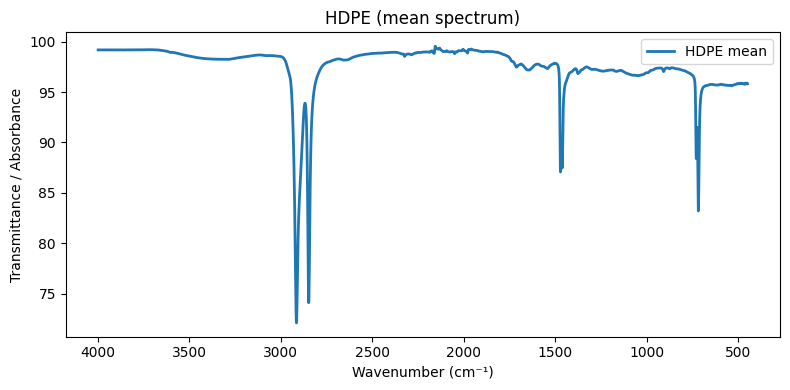

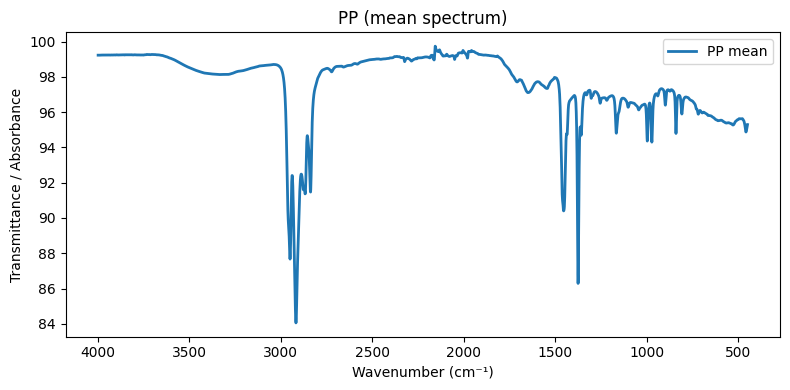

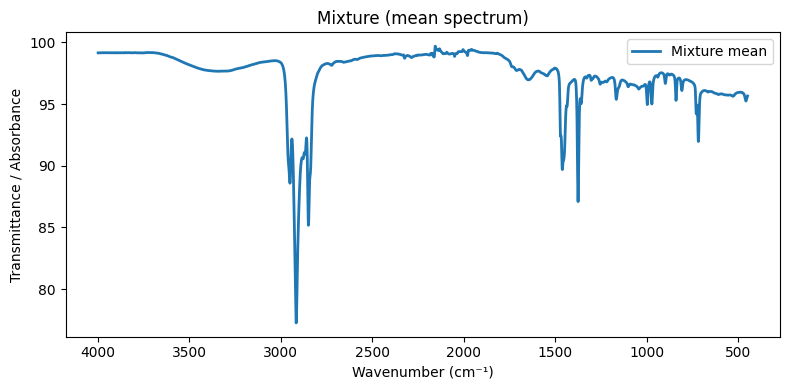

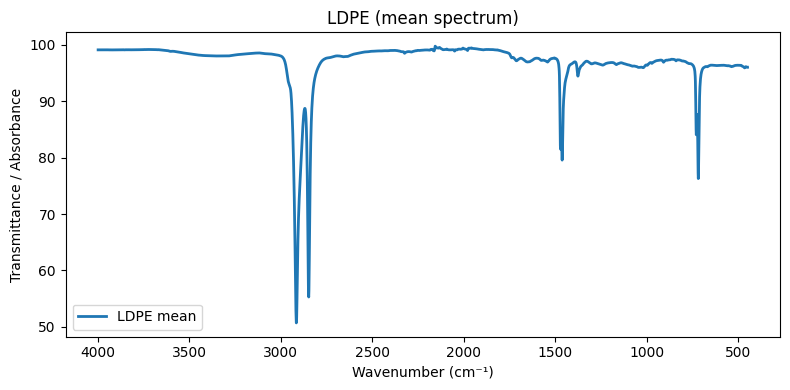

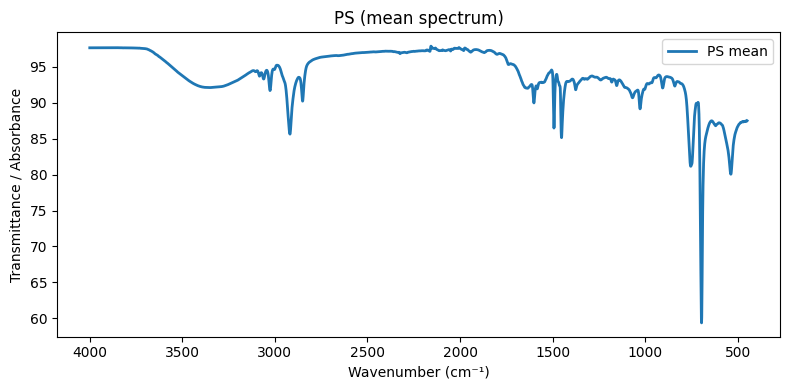

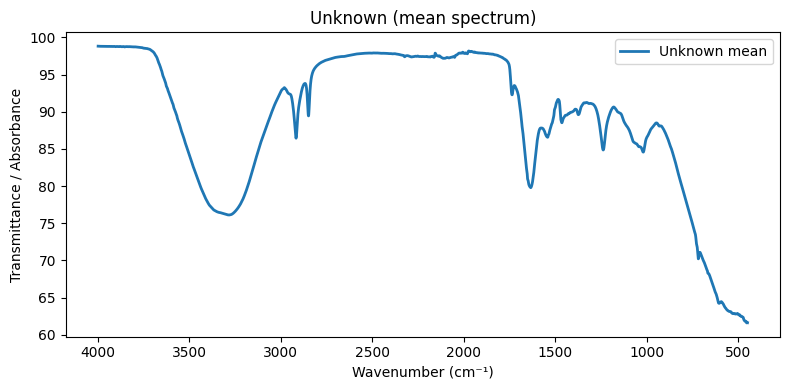

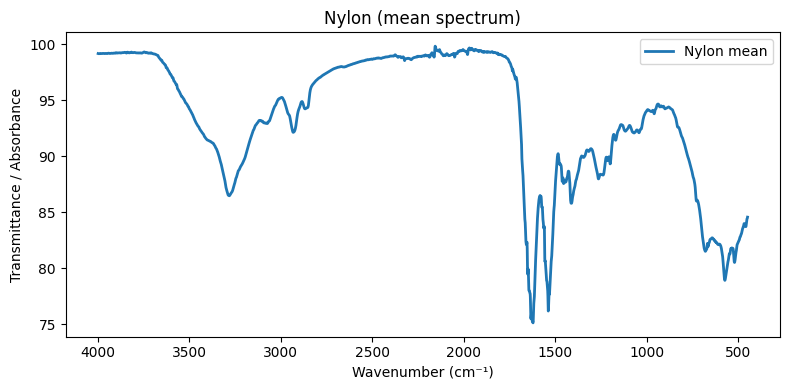

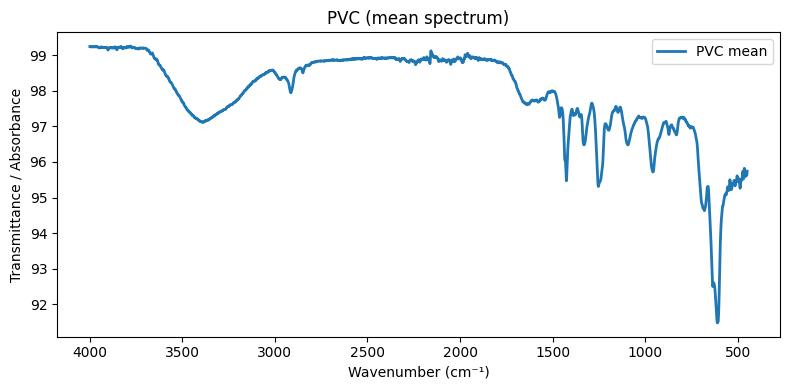

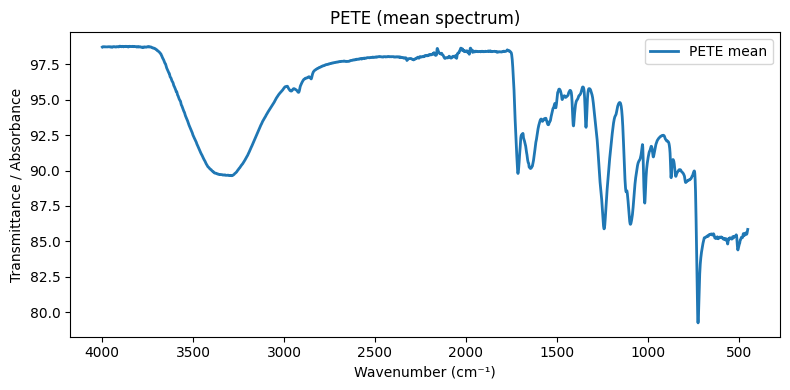

In [5]:
# 0) 파장 축 준비
wave_cols = jung.columns[2:]                # '4000' ~ '450'
wave_nums = wave_cols.astype(int)           # x축용 숫자

# 1) 여러 개 샘플이 있는 것 / 적게 있는 것 (그냥 그룹만 나눠 둔 것, 로직은 동일)
multi_polymers  = ['HDPE', 'PP', 'Mixture', 'LDPE', 'PS', 'Unknown']
single_polymers = ['Nylon', 'PVC', 'PETE']

# ---------- A. HDPE, PP, Mixture, LDPE, PS, Unknown : 평균 스펙트럼 ----------
for poly in multi_polymers:
    subset = jung[jung['identified'] == poly]

    if subset.empty:
        print(f"{poly} 데이터가 없습니다.")
        continue

    # identified가 poly인 행들의 주파수별 평균값 계산
    mean_spectrum = subset[wave_cols].astype(float).mean(axis=0).values

    plt.figure(figsize=(8, 4))
    plt.plot(wave_nums, mean_spectrum, label=f"{poly} mean", linewidth=2)

    plt.gca().invert_xaxis()
    plt.title(f"{poly} (mean spectrum)")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Transmittance / Absorbance")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- B. Nylon, PVC, PETE : 평균 스펙트럼 (로직 동일) ----------
for poly in single_polymers:
    subset = jung[jung['identified'] == poly]

    if subset.empty:
        print(f"{poly} 데이터가 없습니다.")
        continue

    mean_spectrum = subset[wave_cols].astype(float).mean(axis=0).values

    plt.figure(figsize=(8, 4))
    plt.plot(wave_nums, mean_spectrum, label=f"{poly} mean", linewidth=2)

    plt.gca().invert_xaxis()
    plt.title(f"{poly} (mean spectrum)")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Transmittance / Absorbance")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Kedzierski
- PA를 Nylon과 함께 묶어도 될까?
- Poly(ethylene) = PET/PETE (폴리에틸렌 테레프탈레이트)/ HDPE (고밀도 폴리에틸렌)/ LDPE (저밀도 폴리에틸렌) -> 뭐로 통일하지?
- Poly(propylene) = PP
- Poly(styrene) = PS
Poly(urethane) = PU
Poly(vinylchloride) = PVC

In [6]:
ked = pd.read_csv('/content/drive/MyDrive/2025/URP/data/Kedzierski et Dataset.csv')
ked

,Nom,Interpretation,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,...,617.14062,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354
0,M242_141014_1_TM0110B10,Animal fibre like,-0.040366,-0.135578,-0.221583,-0.178677,-0.062108,0.036045,0.097367,0.140272,...,4.588121,4.054936,3.972936,3.872520,3.164385,1.876155,0.578717,-0.018923,0.009571,0.047273
1,SA_160418_NA_1,Cellulose acetate,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,...,2.623865,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218
2,SA_160418_NA_2,Cellulose acetate,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,...,1.134722,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628
3,SA_160418_NA_3,Cellulose acetate,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,...,6.068466,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635
4,SA_160418_NA_4,Cellulose acetate,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,...,3.276646,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,M213_041014_4_TM0014A1,Unknown,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,...,3.505148,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117
966,M14_060614_315_TM0008E5,Unknown,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,...,-2.542803,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533
967,M23_080614_315_TM0023E12,Unknown,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,...,0.920250,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747
968,M4_030614_315_TM0011C8,Unknown,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,...,1.465810,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723


In [7]:
ked = ked.drop(columns = 'Nom ')
Interpretation_counts = ked['Interpretation '].value_counts()
Interpretation_counts

,count
Interpretation,
Poly(ethylene),228
Poly(propylene),195
Poly(ethylene) + fouling,148
Poly(styrene),66
Morphotype 1,55
Cellulose acetate,54
Ethylene propylene rubber,49
Poly(propylene) like,48
PEVA,43


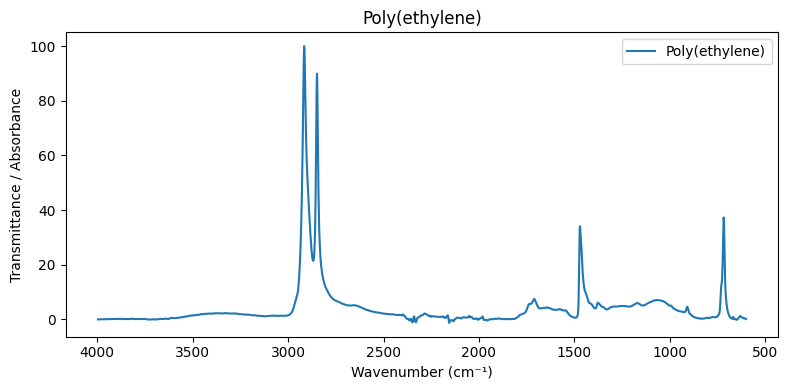

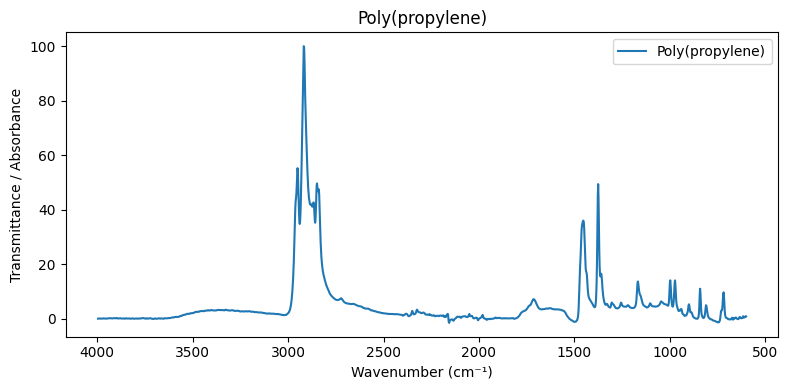

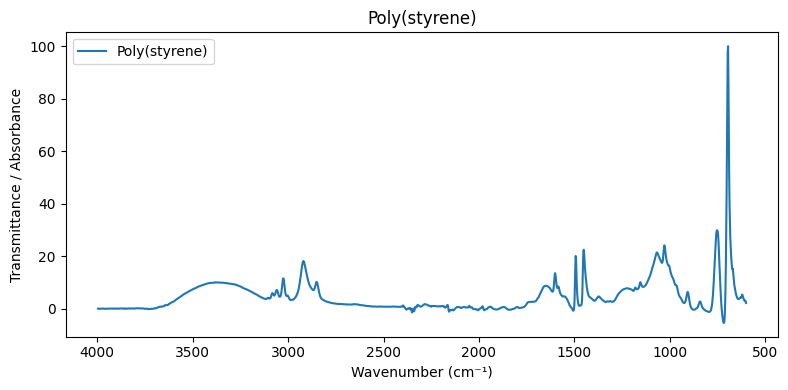

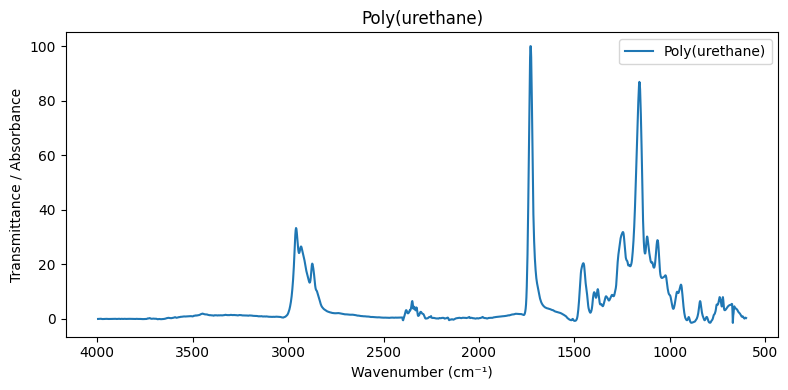

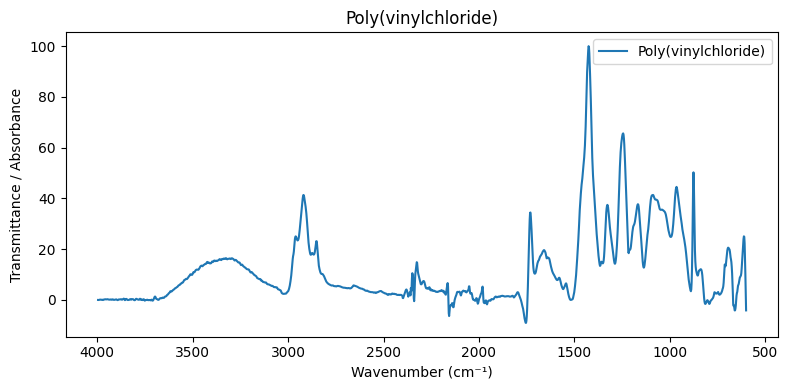

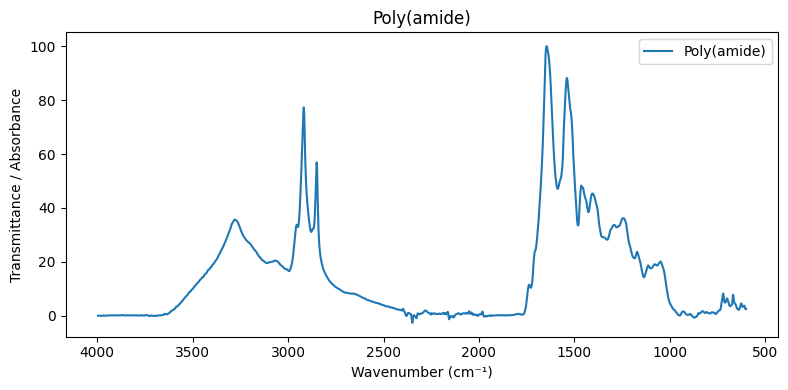

In [8]:
ked.columns = ked.columns.str.strip()

# 1) 같이 보고 싶은 폴리머들
target_polymers = [
    'Poly(ethylene)',
    'Poly(propylene)',
    'Poly(styrene)',
    'Poly(urethane)',
    'Poly(vinylchloride)',
    'Poly(amide)',
]

# 2) 파장 컬럼 (Interpretation 제외한 모든 컬럼)
wave_cols = ked.columns[1:]
x = wave_cols.astype(float)

# 3) 폴리머별로 그래프 하나씩
for poly in target_polymers:
    subset = ked[ked['Interpretation'] == poly]

    if subset.empty:
        print(f"{poly} 데이터 없음")
        continue

    # 대표 스펙트럼 1개 선택 (필요하면 head(3)로 여러 개 가능)
    row = subset.iloc[0]
    spectrum = row[wave_cols].to_numpy(dtype=float)

    plt.figure(figsize=(8, 4))
    plt.plot(x, spectrum, label=poly)
    plt.gca().invert_xaxis()
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Transmittance / Absorbance")
    plt.title(poly)
    plt.legend()
    plt.tight_layout()
    plt.show()

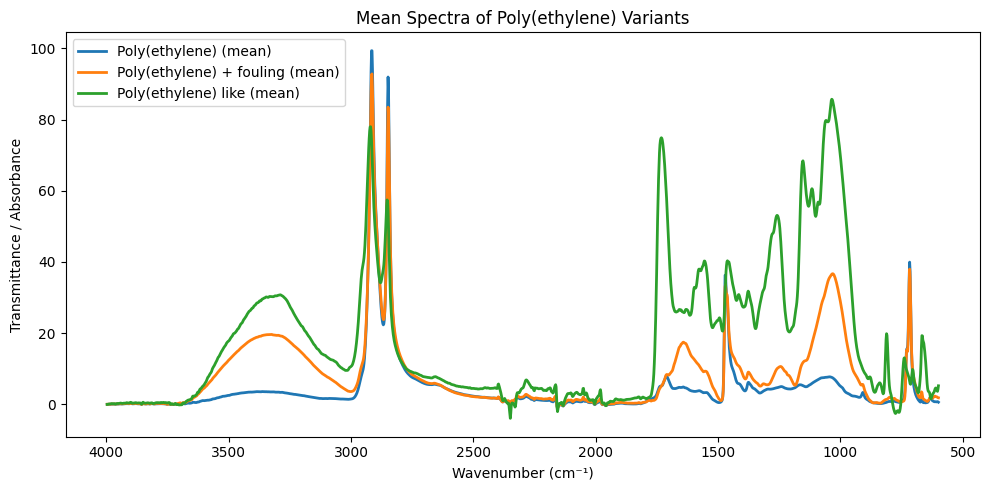

In [9]:
# 1) 보고 싶은 Interpretation 3개
targets = [
    'Poly(ethylene)',
    'Poly(ethylene) + fouling',
    'Poly(ethylene) like'
]

# 2) 파장 컬럼 (Interpretation 제외)
wave_cols = ked.columns[1:].astype(float)   # x축이 float이어야 정렬됨
x = wave_cols

plt.figure(figsize=(10, 5))

# 3) target별 평균 스펙트럼 계산 후 시각화
for poly in targets:
    subset = ked[ked['Interpretation'] == poly]

    if subset.empty:
        print(f"{poly} 데이터 없음")
        continue

    # y값 평균: DataFrame of only spectrum columns → mean row (axis=0)
    mean_spectrum = subset.iloc[:, 1:].astype(float).mean(axis=0).values

    plt.plot(x, mean_spectrum, label=f"{poly} (mean)", linewidth=2)

# x축 FTIR 스타일
plt.gca().invert_xaxis()

plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Transmittance / Absorbance")
plt.title("Mean Spectra of Poly(ethylene) Variants")
plt.legend()
plt.tight_layout()
plt.show()

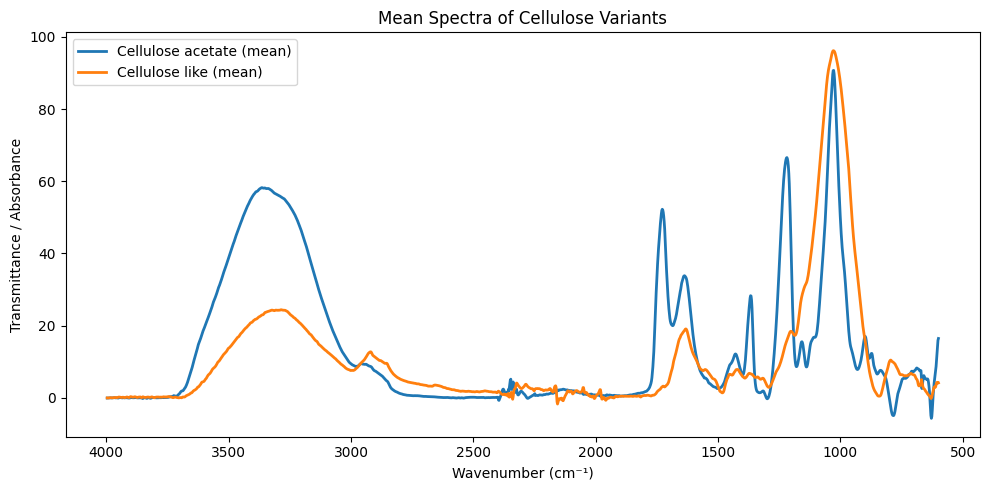

In [10]:
# 1) 보고 싶은 Interpretation 3개
targets = [
    'Cellulose acetate',
    'Cellulose like'
]

# 2) 파장 컬럼 (Interpretation 제외)
wave_cols = ked.columns[1:].astype(float)   # x축이 float이어야 정렬됨
x = wave_cols

plt.figure(figsize=(10, 5))

# 3) target별 평균 스펙트럼 계산 후 시각화
for cel in targets:
    subset = ked[ked['Interpretation'] == cel]

    if subset.empty:
        print(f"{cel} 데이터 없음")
        continue

    # y값 평균: DataFrame of only spectrum columns → mean row (axis=0)
    mean_spectrum = subset.iloc[:, 1:].astype(float).mean(axis=0).values

    plt.plot(x, mean_spectrum, label=f"{cel} (mean)", linewidth=2)

# x축 FTIR 스타일
plt.gca().invert_xaxis()

plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Transmittance / Absorbance")
plt.title("Mean Spectra of Cellulose Variants")
plt.legend()
plt.tight_layout()
plt.show()

# figshare
- ABS는 이상치가 하나 있는 거 같음

In [13]:
zip_path = "/content/drive/MyDrive/2025/URP/data/24593022.zip"

rows = []

with zipfile.ZipFile(zip_path) as z:
  for fname in z.namelist():
    with z.open(fname) as f:
      df = pd.read_csv(f, header = None, skiprows = 2)

    df = df.iloc[:, :2]
    df.columns = ['wavenumber', 'value']

    df = df.dropna()
    df["wavenumber"] = pd.to_numeric(df["wavenumber"], errors="coerce")
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.dropna()

    wide = df.set_index('wavenumber').T

    wide.columns = wide.columns.astype(int)
    wide = wide.reindex(sorted(wide.columns, reverse = True), axis = 1)

    base = os.path.basename(fname)
    name = os.path.splitext(base)[0]
    plastic = name.split("-")[0]

    wide.insert(0, 'identified', plastic)
    rows.append(wide)

result = pd.concat(rows, ignore_index = True)
cols = ['identified'] + sorted(
    [c for c in result.columns if c != 'identified'],
    key = int,
    reverse = True
)
result = result[cols]

result

wavenumber,identified,4000,3999,3998,3997,3996,3995,3994,3993,3992,...,659,658,657,656,655,654,653,652,651,650
0,ABS,97.4000,97.4000,97.4000,97.4000,97.4000,97.4100,97.4100,97.4100,97.4100,...,85.8900,86.1100,86.2800,86.4500,86.6100,86.7600,86.9000,87.0300,87.1200,87.1800
1,ABS,0.0067,0.0067,0.0067,0.0067,0.0068,0.0068,0.0067,0.0067,0.0066,...,0.0311,0.0311,0.0311,0.0310,0.0308,0.0306,0.0304,0.0301,0.0298,0.0296
2,ABS,99.2600,99.2600,99.2600,99.2600,99.2600,99.2600,99.2600,99.2600,99.2600,...,93.3400,93.4600,93.5700,93.6500,93.6800,93.7000,93.7300,93.7800,93.8300,93.8700
3,EVA,99.8000,99.8000,99.7900,99.7900,99.7900,99.7900,99.7900,99.7900,99.7900,...,98.0800,98.0000,97.8900,97.7900,97.7100,97.6500,97.5900,97.5000,97.3800,97.2400
4,EVA,99.8500,99.8400,99.8400,99.8500,99.8500,99.8500,99.8500,99.8500,99.8500,...,97.3300,97.2000,97.0500,96.8900,96.7300,96.5500,96.3500,96.1300,95.9300,95.7500
5,EVA,97.9100,97.9100,97.9100,97.9100,97.9100,97.9200,97.9200,97.9200,97.9200,...,77.8300,77.8800,77.9200,77.9000,77.8700,77.7900,77.6900,77.6000,77.5100,77.4500
6,EVOH,98.0000,98.0000,98.0000,98.0000,98.0100,98.0100,98.0100,98.0100,98.0100,...,73.2800,73.2200,73.1900,73.1500,73.1100,73.0500,72.9500,72.8500,72.7700,72.7200
7,EVOH,99.6500,99.6500,99.6500,99.6500,99.6500,99.6500,99.6500,99.6400,99.6400,...,85.2500,85.2000,85.1500,85.1000,85.0700,85.0600,85.0200,84.9400,84.8600,84.8100
8,EVOH,98.1700,98.1700,98.1700,98.1700,98.1700,98.1700,98.1700,98.1700,98.1700,...,73.1100,73.0600,73.0100,72.9600,72.9100,72.8700,72.8000,72.6900,72.6000,72.5400
9,EVOH,98.4500,98.4600,98.4600,98.4600,98.4600,98.4700,98.4700,98.4700,98.4700,...,75.1600,75.1100,75.0600,74.9900,74.9200,74.8600,74.7900,74.7200,74.6500,74.5900


In [16]:
print(result.columns.tolist())

['identified', 4000, 3999, 3998, 3997, 3996, 3995, 3994, 3993, 3992, 3991, 3990, 3989, 3988, 3987, 3986, 3985, 3984, 3983, 3982, 3981, 3980, 3979, 3978, 3977, 3976, 3975, 3974, 3973, 3972, 3971, 3970, 3969, 3968, 3967, 3966, 3965, 3964, 3963, 3962, 3961, 3960, 3959, 3958, 3957, 3956, 3955, 3954, 3953, 3952, 3951, 3950, 3949, 3948, 3947, 3946, 3945, 3944, 3943, 3942, 3941, 3940, 3939, 3938, 3937, 3936, 3935, 3934, 3933, 3932, 3931, 3930, 3929, 3928, 3927, 3926, 3925, 3924, 3923, 3922, 3921, 3920, 3919, 3918, 3917, 3916, 3915, 3914, 3913, 3912, 3911, 3910, 3909, 3908, 3907, 3906, 3905, 3904, 3903, 3902, 3901, 3900, 3899, 3898, 3897, 3896, 3895, 3894, 3893, 3892, 3891, 3890, 3889, 3888, 3887, 3886, 3885, 3884, 3883, 3882, 3881, 3880, 3879, 3878, 3877, 3876, 3875, 3874, 3873, 3872, 3871, 3870, 3869, 3868, 3867, 3866, 3865, 3864, 3863, 3862, 3861, 3860, 3859, 3858, 3857, 3856, 3855, 3854, 3853, 3852, 3851, 3850, 3849, 3848, 3847, 3846, 3845, 3844, 3843, 3842, 3841, 3840, 3839, 3838, 3837, 3

In [17]:
out_path = "/content/drive/MyDrive/2025/URP/data/figshare.csv"
result.to_csv(out_path, index=False)